In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import functions

In [2]:
plt.style.use('ggplot')

In [3]:
# Ejercicio 4

In [4]:
def cuad_min_svd(A: np.ndarray, b: np.ndarray) -> tuple[np.ndarray, float]:
    '''
    Resuelve el problema de cuadrados mínimos (minimizar ||Ax - b||_2) 
    utlizando la descomposición SVD.
    '''

    # Descomposición SVD de A.
    u, s, vh = np.linalg.svd(A, full_matrices=True)
    # Rango(A) = r <= min{m, n}.
    r = sum((np.isclose(s, 0) == False))
    # Pseudoinversa de A.
    A_pseudoinverse = vh[:r, :].T @ np.diag(s[:r]**(-1)) @ u[: , :r].T
    # Solución de minimizar ||Ax - b||_2 y residuo mínimo.
    x = A_pseudoinverse @ b
    r2 = np.linalg.norm(u[:, r:].T @ b)

    return x, r2

In [5]:
# TEST
m = 10
n = 14

A = np.random.random((m, n))
A[-1] = 0
b = np.random.random((m,))
b[1:4] = 0

# Cuadrados Mínimos (SVD)
print('- Cuadrados Mínimos (SVD)')
x_svd, r2_svd = cuad_min_svd(A, b)
print('||r2_svd||_2 =', r2_svd)
print('||x_svd||_2 = ', np.linalg.norm(x_svd, ord=2))

# Cuadrados Mínimos (QR)
print('\n- Cuadrados Mínimos (QR)')
x_qr, r2_qr = functions.sol_cuadmin(A, b, qr=functions.qrhouseholderp)
print('||r2_qr||_2 =', r2_qr)
print('||x_qr||_2 = ', np.linalg.norm(x_qr, ord=2))

# Cuadrados Mínimos (NumPy)
print('\n- Cuadrados Mínimos (NumPy)')
x_np = np.linalg.lstsq(A, b, rcond=None)[0]
print('||r2_np||_2 =', np.linalg.norm(A @ x_np - b, ord=2))
print('||x_np||_2 = ', np.linalg.norm(x_np, ord=2))

- Cuadrados Mínimos (SVD)
||r2_svd||_2 = 0.9766884752797902
||x_svd||_2 =  1.3610304423697077

- Cuadrados Mínimos (QR)
||r2_qr||_2 = 0.9766884752797902
||x_qr||_2 =  1.9155874706020624

- Cuadrados Mínimos (NumPy)
||r2_np||_2 = 0.9766884752797902
||x_np||_2 =  1.3610304423697075


In [6]:
A = np.loadtxt('data/A_p5e4.txt')
b = np.loadtxt('data/b_p5e4.txt')

print('dim(A) =', A.shape)
print('dib(b) =', b.shape)

dim(A) = (80, 20)
dib(b) = (80,)


In [7]:
# Cuadrados Mínimos (SVD)
print('- Cuadrados Mínimos (SVD)')
x_svd, r2_svd = cuad_min_svd(A, b)
print('||r2_svd||_2 =', r2_svd)
print('||x_svd||_2 = ', np.linalg.norm(x_svd, ord=2))

# Cuadrados Mínimos (QR)
print('\n- Cuadrados Mínimos (QR)')
x_qr, r2_qr = functions.sol_cuadmin(A, b, qr=functions.qrhouseholderp)
print('||r2_qr||_2 =', r2_qr)
print('||x_qr||_2 = ', np.linalg.norm(x_qr, ord=2))

# Cuadrados Mínimos (NumPy)
print('\n- Cuadrados Mínimos (NumPy)')
x_np = np.linalg.lstsq(A, b, rcond=None)[0]
print('||r2_np||_2 =', np.linalg.norm(A @ x_np - b, ord=2))
print('||x_np||_2 = ', np.linalg.norm(x_np, ord=2))

- Cuadrados Mínimos (SVD)
||r2_svd||_2 = 7.764496422368634
||x_svd||_2 =  0.5693410026125885

- Cuadrados Mínimos (QR)
||r2_qr||_2 = 7.764496422368633
||x_qr||_2 =  0.5693410026125886

- Cuadrados Mínimos (NumPy)
||r2_np||_2 = 7.764496422368633
||x_np||_2 =  0.5693410026125888


In [8]:
# Ejercicio 5

In [9]:
def im_aprox_svd(A: np.ndarray, tol:int):

    # Definimos A_k.
    A_k = np.zeros_like(A)
    # Calcula la descomposición SVD de A.
    u, s, vh = np.linalg.svd(A)
    # Determina el rango de A (Rango(A) = r <= min{m, n}).
    r = sum(s > 0)

    for k in range(r):
        A_k += s[k] * np.outer(u[:, k], vh[k, :])
        if np.linalg.norm(A - A_k, ord=np.inf) < tol:
            break

    fig, ax = plt.subplots(1, 2, figsize=(12, 12))
    ax[0].imshow(A, cmap='gray')
    ax[0].set_title('Original')
    ax[1].imshow(A_k, cmap='gray')
    ax[1].set_title(f'Aproximada - {k} valores singulares')
    plt.show()

In [10]:
image = np.loadtxt('data/p5e5.txt')

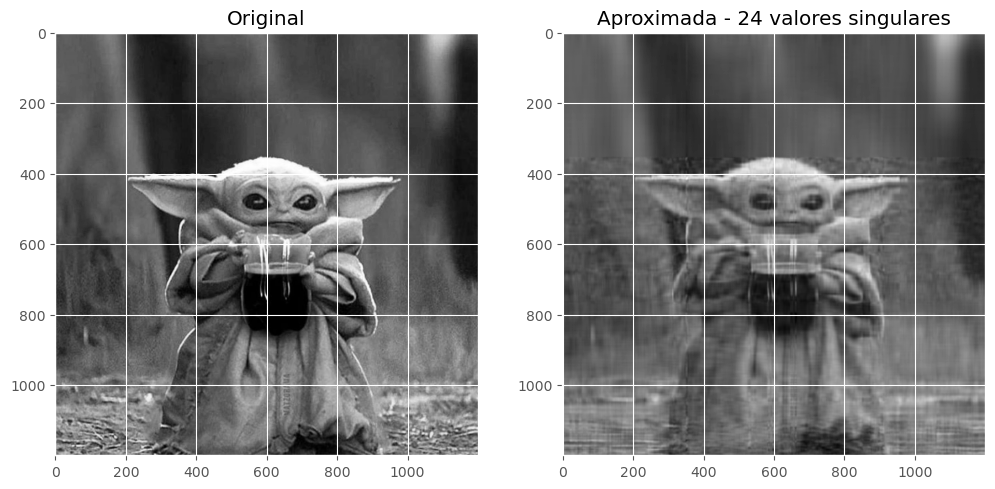

In [11]:
im_aprox_svd(image, tol=25000)

In [12]:
# Ejercicio 6

In [13]:
# Cargamos el dataset
iris = np.loadtxt('data/iris.data', delimiter=',')

In [14]:
# features, target
X = iris[:, :-1]
y = iris[:, -1]

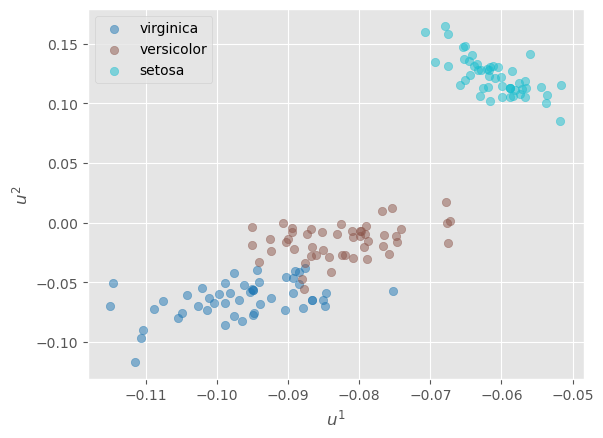

In [15]:
u, _, _ = np.linalg.svd(X)

mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
labels = [mapping[value] for value in y]

colors = plt.cm.tab10(np.linspace(0, 1, len(set(labels))))

for i, label in enumerate(set(labels)):
    index = [j for j, x in enumerate(labels) if x == label]
    plt.scatter(u[index, 0], u[index, 1], alpha=0.5, color=colors[i], label=label)

plt.legend()
plt.xlabel(r'$u^1$')
plt.ylabel(r'$u^2$')
plt.show()


In [16]:
# Ejercicio 7

In [17]:
def autjacobi2D(A: np.ndarray) -> tuple[float, float]:
    '''
    Calcula los coeficentes de la matriz de rotación para diagonalizar una matriz simétrica de tamaño 2x2.
    '''

    assert (A.shape == (2, 2)) and (np.isclose(A, A.T).all()), 'Error: A debe ser una matriz simétrica de tamaño 2x2.'

    c = 1
    s = 0

    if A[0, 1] != 0:

        tau = (A[1, 1] - A[0, 0]) / (2 * A[0, 1])

        if tau >= 0:
            t = - 1 / (tau + np.sqrt(tau**2 + 1))
        else:
            t = 1 / (- tau + np.sqrt(tau**2 + 1))

        c = 1 / np.sqrt(1 + t**2)
        s = t * c
    
    return c, s

In [18]:
# TEST
A1 = np.random.random((2, 2))
A2 = np.random.random((2, 2))
A = A1.T @ A1 - A2.T @ A2
print('A =')
print(A)

print('\n- Método de Jacobi')
c, s = autjacobi2D(A)
Q = np.array([[c, -s], [s, c]])
print('(lambda_1, lambda_2) =', np.diag(Q.T @ A @ Q))

print('\n- NumPy')
print('(lambda_1, lambda_2) =', np.linalg.eigvals(A))

A =
[[-0.5028513  -0.17556189]
 [-0.17556189 -0.01347238]]

- Método de Jacobi
(lambda_1, lambda_2) = [-0.55931779  0.04299412]

- NumPy
(lambda_1, lambda_2) = [-0.55931779  0.04299412]


In [19]:
# TEST
A = np.random.random((2, 2))
A = (A + A.T) / 2
print('A =')
print(A)

print('- Método de Jacobi')
c, s = autjacobi2D(A)
Q = np.array([[c, -s], [s, c]])
print('(lambda_1, lambda_2) =', np.diag(Q.T @ A @ Q))

print('- NumPy')
print('(lambda_1, lambda_2) =', np.linalg.eigvals(A))

A =
[[0.82645486 0.77939032]
 [0.77939032 0.89914437]]
- Método de Jacobi
(lambda_1, lambda_2) = [0.08256234 1.64303689]
- NumPy
(lambda_1, lambda_2) = [0.08256234 1.64303689]


In [20]:
def off(A: np.ndarray) -> float:
    '''
    Distancia en norma de Frobenius de A al conjunto de matrices diagonales. 
    '''

    assert A.shape[0] == A.shape[1], 'Error: A debe ser una matriz de tamaño nxn.'

    return np.linalg.norm(A - np.diag(np.diag(A)), ord='fro')


In [21]:
def autjacobi(A: np.ndarray, epsilon=1e-10, m=500) -> tuple[np.ndarray, np.ndarray]:
    '''
    Aplica el método de Jacobi para diagonalizar una matriz simétrica de tamaño nxn.
    '''

    assert np.array_equal(A, A.T), 'Error: La matriz A debe ser simétrica de tamaño nxn.'

    n = A.shape[0]

    Q = np.eye(n)
    B = A.copy()

    for k in range(m):

        if off(B) < epsilon:
            break

        i, j = np.unravel_index(np.argmax(np.abs(B - np.diag(np.diag(B)))), B.shape)

        c, s = autjacobi2D(B[np.ix_([i, j], [i, j])])
        J = np.array([[c, -s], [s, c]])

        B[[i, j], :] = J.T @ B[[i, j], :]
        B[:, [i, j]] = B[:, [i, j]] @ J
        Q[:, [i, j]] = Q[:, [i, j]] @ J

    return B, Q

In [22]:
n = 5

A1 = np.random.random((n, n))
A2 = np.random.random((n, n))
A = A1.T @ A1 - A2.T @ A2
print('A =')
print(A)

print('\n- Método de Jacobi')
B, Q = autjacobi(A)
print(sorted(np.diag(B), reverse=True))

print('\n- NumPy')
print(sorted(np.linalg.eigvals(A), reverse=True))

A =
[[ 0.43173634  1.22732503  0.2969276   0.34995337 -0.39013543]
 [ 1.22732503  1.61367784  1.48926164  0.49134807  0.25766825]
 [ 0.2969276   1.48926164  0.05855773  0.68684316 -0.56706208]
 [ 0.34995337  0.49134807  0.68684316  0.29805488  0.14428531]
 [-0.39013543  0.25766825 -0.56706208  0.14428531 -1.2101277 ]]

- Método de Jacobi
[3.314616085782118, 0.24031168429522298, -0.048990343197160356, -0.4356188053595562, -1.8784195267309653]

- NumPy
[3.3146160857821156, 0.2403116842952229, -0.04899034319716022, -0.4356188053595562, -1.8784195267309634]


In [23]:
# Ejercicio 8

In [24]:
def dvsingulares(A: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    '''
    Calcula la Descomposición en Valores Singulares (SVD) de una matriz A.
    '''

    # Calcula los autovalores y autovectores de C = A.T @ A.
    C = A.T @ A
    D, W = autjacobi(C)
    # Realiza la descomposición QR con permutación de columnas a la matriz A @ W
    Q, R, P = functions.qrhouseholderp(A @ W)
    # Define U = Q, V = W @ P y S = R
    U = Q
    V = W @ P
    SIGMA = R

    return U, V, SIGMA

In [25]:
# TEST
m = 27
n = 21

A = np.random.random((m, n))

print('- dvsingulares')
U, V, SIGMA = dvsingulares(A)
print(np.diag(SIGMA))

print('\n- np.linalg.svd')
u, s, vh = np.linalg.svd(A)
print(s)

- dvsingulares
[11.88276468  2.57632265  2.40019912  2.24087315  2.02827394  1.94956562
  1.83644633  1.72951464  1.46183453  1.35057735  1.21870654  1.11332166
  0.97884255  0.94204955  0.89499125  0.82368502  0.62290033  0.51060283
  0.41591606  0.30547091  0.26692352]

- np.linalg.svd
[11.88276468  2.57632266  2.40019915  2.24087318  2.02827399  1.94956564
  1.83644634  1.72951463  1.46183453  1.35057739  1.21870656  1.11332166
  0.97884262  0.9420496   0.89499129  0.82368522  0.62290051  0.51060295
  0.41591598  0.30547067  0.2669235 ]


In [26]:
# TEST
m = 9
n = 14

A = np.random.random((m, n))

print('- dvsingulares')
U, V, SIGMA = dvsingulares(A)
print(np.diag(SIGMA))

print('\n- np.linalg.svd')
u, s, vh = np.linalg.svd(A)
print(s)

- dvsingulares
[5.57309589 1.45541456 1.34385024 1.09796845 1.01284934 0.75196829
 0.63298669 0.48263981 0.32478321]

- np.linalg.svd
[5.57309589 1.45541456 1.34385024 1.09796845 1.01284934 0.75196829
 0.63298669 0.48263981 0.32478321]


In [27]:
# Ejercicio 9

In [28]:
def autpotenciasinf(A: np.ndarray, q0: np.ndarray, epsilon=1e-10, m=500) -> tuple[np.ndarray, float]:
    '''
    Dada una matriz A de tamaño nxn con coeficiente reales calcula el autovector dominante y 
    su correspondiente autovalor utilizando el método de potencias en norma infinito.
    '''

    # q^(k+1) = (1 / [A @ q^(k)]_jk) * A @ q^(k) ; rho_(k+1) = [A @ q^(k+1)]_jk

    q_hat = A @ q0
    rho_hat = np.inf

    for k in range(m):

        j = np.argmax(np.abs(q_hat))

        q = q_hat / q_hat[j]
        q_hat = A @ q 
        rho = q_hat[j]

        if np.abs(rho - rho_hat) < epsilon:
            break

        rho_hat = rho

    print('k =', k + 1)

    return q, rho

In [29]:
def autpotencias2(A: np.ndarray, q0: np.ndarray, epsilon=1e-10, m=500) -> tuple[np.ndarray, float]:
    '''
    Dada una matriz A de tamaño nxn con coeficiente reales calcula el autovector dominante y 
    su correspondiente autovalor utilizando el método de potencias en norma 2.
    '''
    
    # q^(k+1) = (1 / ||A @ q^(k)||_2) * A @ q^(k) ; rho_(k+1) = q^(k+1).T @ A @ q^(k+1)

    q_hat = A @ q0
    rho_hat = q0.T @ q_hat / np.linalg.norm(q0, ord=2)**2

    for k in range(m):

        q = q_hat / np.linalg.norm(q_hat, ord=2)
        q_hat = A @ q 
        rho = q.T @ q_hat

        if np.abs(rho - rho_hat) < epsilon:
            break

        rho_hat = rho

    print('k =', k + 1)

    return q, rho

In [30]:
def autrayleigh(A: np.ndarray, q0: np.ndarray, epsilon=1e-10, m=500) -> tuple[np.ndarray, float]:
    '''
    Dada una matriz A de tamaño nxn con coeficiente reales calcula el autovector dominante y 
    su correspondiente autovalor utilizando la iteración del cociente de Rayleigh.
    '''

    q = q0 / np.linalg.norm(q0, ord=2)
    q_hat = q.copy()
    rho = q.T @ A @ q 

    I = np.eye(A.shape[0])

    for k in range(m):

        z = functions.sol_egauss(A - rho * I, q_hat)
        sigma = np.linalg.norm(z, ord=2)
        q = z /sigma
        theta = (q.T @ q_hat) / sigma

        if np.abs(theta) < epsilon:
            break

        q_hat = q.copy()
        rho = rho + theta

    print('k =', k + 1)

    return q, rho + theta

In [31]:
# TEST
n = 5

A = np.random.random((n, n))
q0 = np.random.random(n)

print('A =')
print(A)
print('q0 =', q0)

print('\n- autpotenciasinf')
q_inf, rho_inf = autpotenciasinf(A, q0)
print('rho_inf =', rho_inf)
print('q_inf   =', q_inf)

print('\n- autpotencias2')
q_2, rho_2 = autpotencias2(A, q0)
print('rho_2 =', rho_2)
print('q_2   =', q_2)

print('\n- autrayleigh')
q_rayleigh, rho_rayleigh = autrayleigh(A, q0)
print('rho_rayleigh =', rho_rayleigh)
print('q_rayleigh   =', q_rayleigh)

print('\n- np.linalg.eigvals')
q_np = np.linalg.eigvals(A).max()
print('q_np =', q_np)

A =
[[0.18780267 0.86936817 0.78884597 0.08887762 0.55039232]
 [0.64918686 0.65218656 0.51615639 0.99858743 0.06074803]
 [0.39206291 0.35027401 0.31090467 0.16040364 0.03378482]
 [0.57747665 0.99395253 0.96248546 0.2002385  0.30873732]
 [0.24874117 0.80858785 0.4402415  0.29850615 0.97911172]]
q0 = [0.99278836 0.0298221  0.24546089 0.92615047 0.84465101]

- autpotenciasinf
k = 18
rho_inf = 2.430530147309361
q_inf   = [0.80278414 0.97878895 0.39840282 0.95442813 1.        ]

- autpotencias2
k = 17
rho_2 = 2.4305301473234544
q_2   = [0.41892733 0.51077422 0.20790375 0.49806169 0.52184306]

- autrayleigh
k = 6
rho_rayleigh = 2.430530147316022
q_rayleigh   = [-0.41892733 -0.51077422 -0.20790375 -0.49806169 -0.52184306]

- np.linalg.eigvals
q_np = 2.430530147316025


In [32]:
# TEST
n = 3

A = np.random.random((n, n)) - np.random.random((n, n))
q0 = np.random.random(n)

print('A =')
print(A)
print('q0 =', q0)

print('\n- autpotenciasinf')
q_inf, rho_inf = autpotenciasinf(A, q0)
print('rho_inf =', rho_inf)
print('q_inf   =', q_inf)

print('\n- autpotencias2')
q_2, rho_2 = autpotencias2(A, q0)
print('rho_2 =', rho_2)
print('q_2   =', q_2)

print('\n- autrayleigh')
q_rayleigh, rho_rayleigh = autrayleigh(A, q0)
print('rho_rayleigh =', rho_rayleigh)
print('q_rayleigh   =', q_rayleigh)

print('\n- np.linalg.eigvals')
q_np = np.linalg.eigvals(A).max()
print('q_np =', q_np)

A =
[[ 0.1148169  -0.9627153   0.06585712]
 [-0.09697902  0.44989619 -0.34538178]
 [ 0.09017777 -0.25300038  0.11320201]]
q0 = [0.35801573 0.80829463 0.86468587]

- autpotenciasinf
k = 16
rho_inf = 0.7905364487865906
q_inf   = [ 1.         -0.67552091  0.38545923]

- autpotencias2
k = 15
rho_2 = 0.7905364488071118
q_2   = [-0.78935983  0.53322907 -0.30426604]

- autrayleigh
k = 500
rho_rayleigh = -0.004309364428084106
q_rayleigh   = [0.96890197 0.23989004 0.06067732]

- np.linalg.eigvals
q_np = (0.7905364487886493+0j)


In [33]:
# Ejercicio 10

In [34]:
# edad|0-2|2-4|4-6|6-8|8-10|10-12|12-14|

# tasa de fecundidad por faja etaria
f = np.array([0.0, 0.2, 0.9, 0.9, 0.9, 0.8, 0.3])
# proporción de indiviudos por faja etaria que pasan anualmente a la siguiente faja etaria
s = np.array([0.3, 0.7, 0.9, 0.9, 0.9, 0.6, 0.0])
# cantidad de individuos por faja etaria al final del año t
n = np.array([10, 2, 8, 5, 12, 0, 1])

# matriz de Leslie
L = np.concatenate((f.reshape(1, -1), np.diag(s)), axis=0)[:-1, :]
L

array([[0. , 0.2, 0.9, 0.9, 0.9, 0.8, 0.3],
       [0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.7, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.9, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.9, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.9, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. ]])

In [35]:
_, Lambda = autrayleigh(L, n)
Lambda # Como Lambda < 1 la población decrece exponencialmente

k = 5


0.927193682891313

In [36]:
print('# t =', 0)
print(n)

for i in range(1, 101):
    n = L @ n

print('# t =', 100)
print(n)

# t = 0
[10  2  8  5 12  0  1]
# t = 100
[0.01021885 0.00330638 0.0024962  0.00242299 0.00235193 0.00228295
 0.00147733]


In [37]:
# Ejercicio 13

In [38]:
def fhess(A: np.ndarray, p=0) -> tuple[np.ndarray, np.ndarray]:
    '''
    Calcula la forma de Hessenberg de una matriz cuadrada A 
    mediante reflexiones de Householder o rotaciones de Givens.
    '''

    n = A.shape[0]

    H = A.copy()
    Q = np.eye(n)

    # Householder
    if p == 0:

        for j in range(n-2):

            I = np.s_[j+1: n]
            J = np.s_[j: n]

            u, rho = functions.householder(H[I, j])
            w = rho * u

            H[I, J] = H[I, J] - np.outer(w, u.T @ H[I, J])
            H[:, I] = H[:, I] - H[:, I] @ np.outer(w, u.T)
            Q[:, I] = Q[:, I] - Q[:, I] @ np.outer(w, u.T)

    # Givens
    elif p == 1:

        for j in range(n-2):
            for i in range(j+2, n):

                I = np.s_[j+1, i]
                J = np.s_[j: n]

                c, s = functions.givens(H[j+1, j], H[i, j])
                G = np.array([[c, -s], [s, c]])

                H[I, J] = G @ H[I, J]
                H[:, I] = H[:, I] @ G.T
                Q[:, I] = Q[:, I] @ G.T
        
    else:
        print('Seleccione p = 0 ó p = 1')
        print('- Reflexiones de Householder (p = 0)')
        print('- Rotaciones de Given        (p = 1)')

    return H, Q

In [39]:
# TEST
n = 4

A = np.random.random((n, n))
print('A =')
print(A)

print('\n- Reducción a Hessenberg usando Householder:')
H_h, Q_h = fhess(A, p=0)
print('H_h =')
print(H_h)
print('||H_h - Q_h.T @ A @ Q_h|| =', np.linalg.norm(H_h - Q_h.T @ A @ Q_h))

print('\n- Reducción a Hessenberg usando Givens:')
H_g, Q_g = fhess(A, p=1)
print('H_g =')
print(H_g)
print('||H_g - Q_g.T @ A @ Q_g|| =', np.linalg.norm(H_g - Q_g.T @ A @ Q_g))

print('\n- Reducción a Hessenberg usando SciPy:')
H_s, Q_s = scipy.linalg.hessenberg(A, calc_q=True)
print('H_s =')
print(H_s)
print('||H_g - Q_s.T @ A @ Q_s|| =', np.linalg.norm(H_s - Q_s.T @ A @ Q_s))

A =
[[0.76784024 0.25643285 0.88223741 0.0349732 ]
 [0.59892713 0.21179718 0.92821224 0.37580027]
 [0.90268407 0.1273187  0.57746328 0.76516019]
 [0.19645746 0.40950059 0.93146656 0.89877967]]

- Reducción a Hessenberg usando Householder:
H_h =
[[ 7.67840237e-01  8.69080835e-01 -2.21996202e-01 -2.01841427e-01]
 [ 1.10097583e+00  1.27471804e+00  5.55100271e-01 -6.68687879e-01]
 [ 1.11022302e-16  1.02057749e+00  3.48921301e-01 -3.30819900e-01]
 [ 2.77555756e-17 -4.44089210e-16 -4.10891465e-01  6.44007886e-02]]
||H_h - Q_h.T @ A @ Q_h|| = 3.1596075320385545e-16

- Reducción a Hessenberg usando Givens:
H_g =
[[ 7.67840237e-01  8.69080835e-01 -2.21996202e-01 -2.01841427e-01]
 [ 1.10097583e+00  1.27471804e+00  5.55100271e-01 -6.68687879e-01]
 [-3.41257970e-17  1.02057749e+00  3.48921301e-01 -3.30819900e-01]
 [-1.87145841e-18  1.27798724e-18 -4.10891465e-01  6.44007886e-02]]
||H_g - Q_g.T @ A @ Q_g|| = 1.6898085116689487e-16

- Reducción a Hessenberg usando SciPy:
H_s =
[[ 0.76784024 -0.86908

In [40]:
# Ejercicio 14

In [41]:
def autqr(A: np.ndarray, m=1000) -> tuple[np.ndarray, np.ndarray]:
    '''
    Realiza la descomposición de Schur en IR de la matriz A.
    '''

    n = A.shape[0]
    H, Q = fhess(A)
    rot = np.zeros((n-1, 2))

    for k in range(m):

        for j in range(n - 1):
            
            c, s = functions.givens(H[j, j], H[j + 1, j])
            rot[j, :] = np.array([c, s])
            G = np.array([[c, -s], [s, c]])
            H[[j, j + 1], j:] = G @ H[[j, j + 1], j:]

        for l in range(n - 1):
            c, s = rot[l, :]
            G = np.array([[c, -s], [s, c]])
            H[:, [l, l + 1]] = H[:, [l, l + 1]] @ G.T
            Q[:, [l, l + 1]] = Q[:, [l, l + 1]] @ G.T

    return H, Q

In [42]:
# TEST
n = 3

A = np.random.random((n, n)) - np.random.random((n, n))
print('A =')
print(A)

%precision 4

print('- autqr')
H, Q = autqr(A)
print('H =')
print(H)

print('- np.linalg.eigvals')
print(np.linalg.eigvals(A))

A =
[[ 0.30558497 -0.00402779  0.20990354]
 [ 0.02299837 -0.31323857  0.11142302]
 [-0.4916509  -0.31513188  0.17555108]]
- autqr
H =
[[ 1.9876e-001 -5.6290e-001  2.6301e-001]
 [ 1.9020e-001  2.2917e-001  1.9627e-001]
 [ 1.9608e-195  3.1099e-178 -2.6003e-001]]
- np.linalg.eigvals
[ 0.214+0.3269j  0.214-0.3269j -0.26 +0.j    ]


In [43]:
i = 0
j = 1

print(np.linalg.eigvals(H[np.ix_([i, j], [i, j])]))

[0.214+0.3269j 0.214-0.3269j]


In [44]:
# Ejercicio Extra

In [45]:
# Definimos A
A = np.array([[2, 1], [1, 2]])

print('A =')
print(A)

A =
[[2 1]
 [1 2]]


In [46]:
# Descomposición SVD de A
U, V, SIGMA = dvsingulares(A)

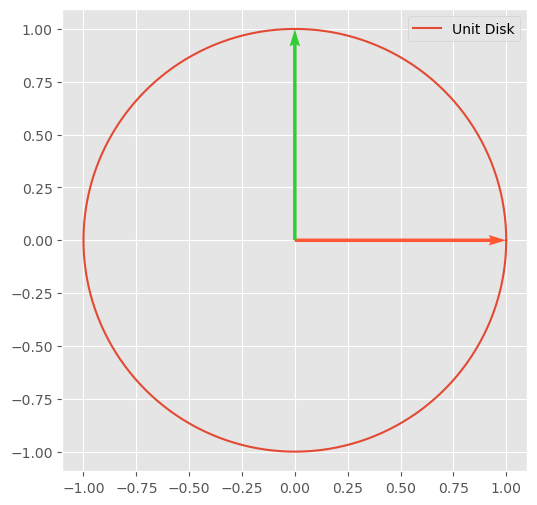

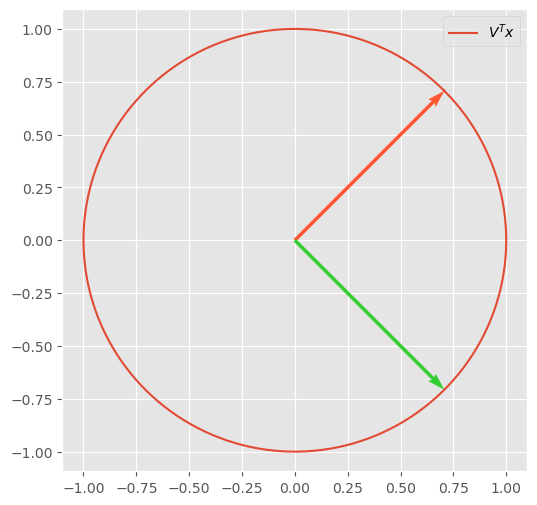

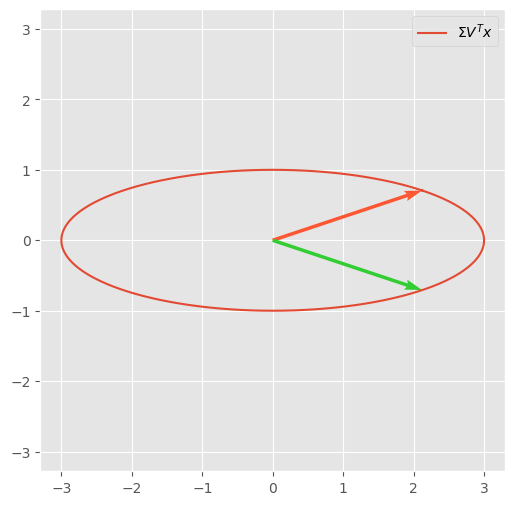

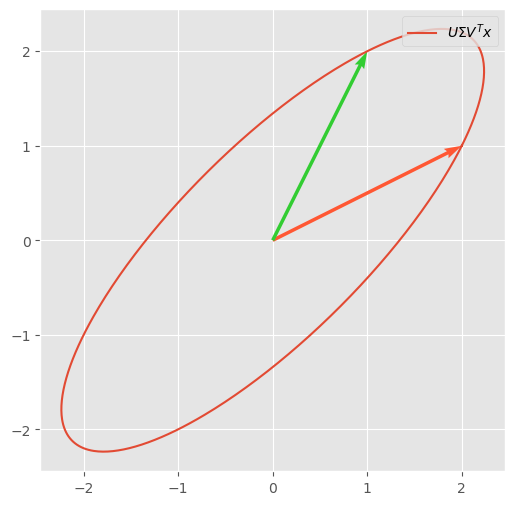

In [47]:
### Unit Disk ###
theta = np.linspace(0, 2 * np.pi, 500)
S = np.vstack([np.cos(theta), np.sin(theta)])
v1 = np.array([1, 0])
v2 = np.array([0, 1])

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(S[0], S[1], label='Unit Disk')
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='#FF5733')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='#32CD32')
ax.axis('equal')
ax.legend(loc='upper right')
plt.show()

### V.T ###
S = V.T @ S
v1 = V.T @ v1
v2 = V.T @ v2

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(S[0], S[1], label=r'$V^T x$')
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='#FF5733')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='#32CD32')
ax.axis('equal')
ax.legend(loc='upper right')
plt.show()

### SIGMA ###
S = SIGMA @ S
v1 = SIGMA @ v1
v2 = SIGMA @ v2

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(S[0], S[1], label=r'$\Sigma V^T x$')
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='#FF5733')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='#32CD32')
ax.axis('equal')
ax.legend(loc='upper right')
plt.show()

### U ###
S = U @ S
v1 = U @ v1
v2 = U @ v2

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(S[0], S[1], label=r'$U \Sigma V^T x$')
ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='#FF5733')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='#32CD32')
ax.axis('equal')
ax.legend(loc='upper right')
plt.show()